# NYC House Price Prediction - Analysis

In this notebook we will analyse the dataset and add a new features and check their correlation with the Price that we want to predict with three different models - Linear Regression, Random Forest and Neural Network

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from haversine import haversine

# Dataset load
df = pd.read_csv('../data/NY-House-Dataset.csv')

# Basic Exploration

In [2]:
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
# Check for missing values
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [5]:
# Describe numeric columns
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


# Summary Statistics for House Price

In [6]:
# Compute the summary statistics for the PRICE column
price_summary = df['PRICE'].describe()

# Display the statistics
print(f"Mean Price: ${price_summary['mean']:,.2f}")
print(f"Median Price (50th Percentile): ${price_summary['50%']:,.2f}")
print(f"Minimum Price: ${price_summary['min']:,.2f}")
print(f"Maximum Price: ${price_summary['max']:,.2f}")
print(f"25th Percentile: ${price_summary['25%']:,.2f}")
print(f"75th Percentile: ${price_summary['75%']:,.2f}")


Mean Price: $2,356,940.17
Median Price (50th Percentile): $825,000.00
Minimum Price: $2,494.00
Maximum Price: $2,147,483,647.00
25th Percentile: $499,000.00
75th Percentile: $1,495,000.00


In [7]:
# We add the LOG_PRICE column to make the distribution of house prices more normal and reduce the impact of extreme outliers for better analysis and modeling.
df['LOG_PRICE'] = np.log1p(df['PRICE'])


# Distribution

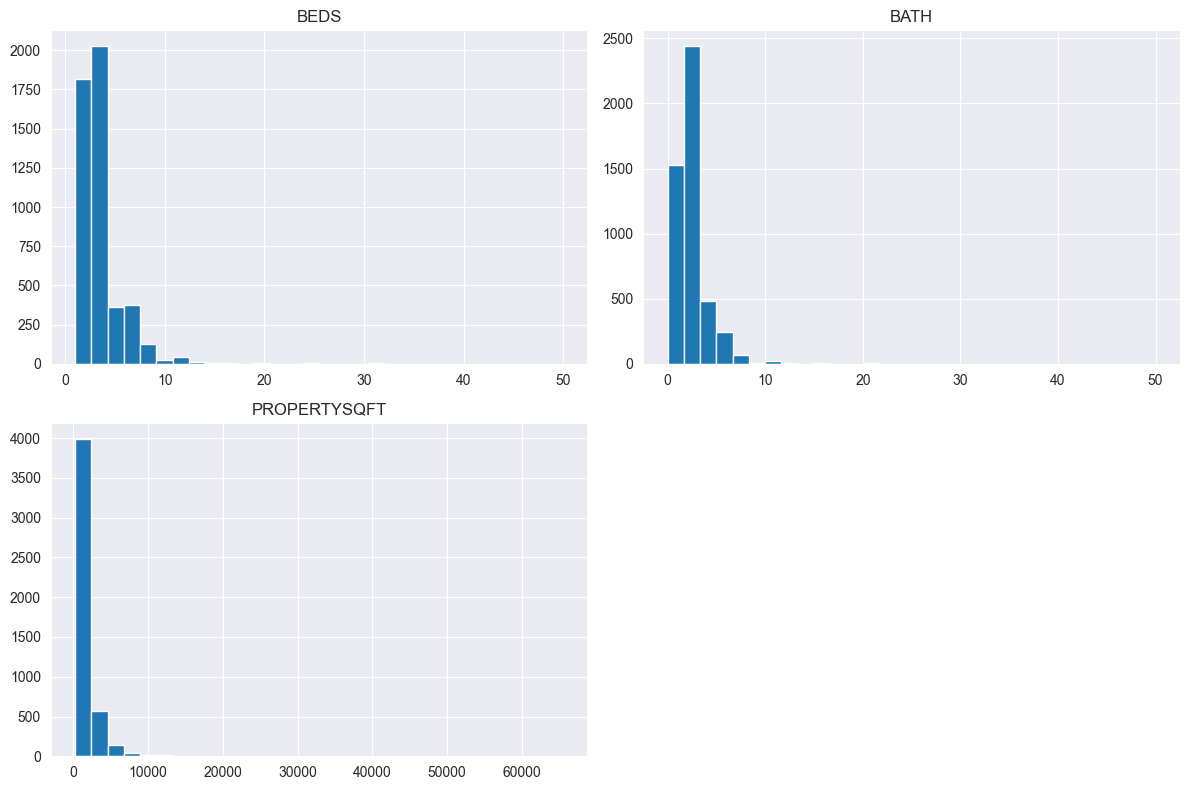

In [8]:
# Numeric features
num_cols = ['BEDS', 'BATH', 'PROPERTYSQFT']
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [9]:
print('Categorical features unique counts')
print('\n')
print('BROKERTITLE count:' + str(len(df['BROKERTITLE'].unique())))
print('TYPE count:' + str(len(df['TYPE'].unique())))
print('ADDRESS count:' + str(len(df['ADDRESS'].unique())))
print('STATE count:' + str(len(df['STATE'].unique())))
print('MAIN_ADDRESS count:' + str(len(df['MAIN_ADDRESS'].unique())))
print('ADMINISTRATIVE_AREA_LEVEL_2 count:' + str(len(df['ADMINISTRATIVE_AREA_LEVEL_2'].unique())))
print('LOCALITY count:' + str(len(df['LOCALITY'].unique())))
print('SUBLOCALITY count:' + str(len(df['SUBLOCALITY'].unique())))
print('STREET_NAME count:' + str(len(df['STREET_NAME'].unique())))
print('LONG_NAME count:' + str(len(df['LONG_NAME'].unique())))
print('FORMATTED_ADDRESS count:' + str(len(df['FORMATTED_ADDRESS'].unique())))



Categorical features unique counts


BROKERTITLE count:1036
TYPE count:13
ADDRESS count:4582
STATE count:308
MAIN_ADDRESS count:4583
ADMINISTRATIVE_AREA_LEVEL_2 count:29
LOCALITY count:11
SUBLOCALITY count:21
STREET_NAME count:174
LONG_NAME count:2731
FORMATTED_ADDRESS count:4550


The dataset is dominated by traditional housing types, especially "Co-op for sale" and "House for sale". Other types like "Land for sale" and "Mobile house for sale" are much less frequent.

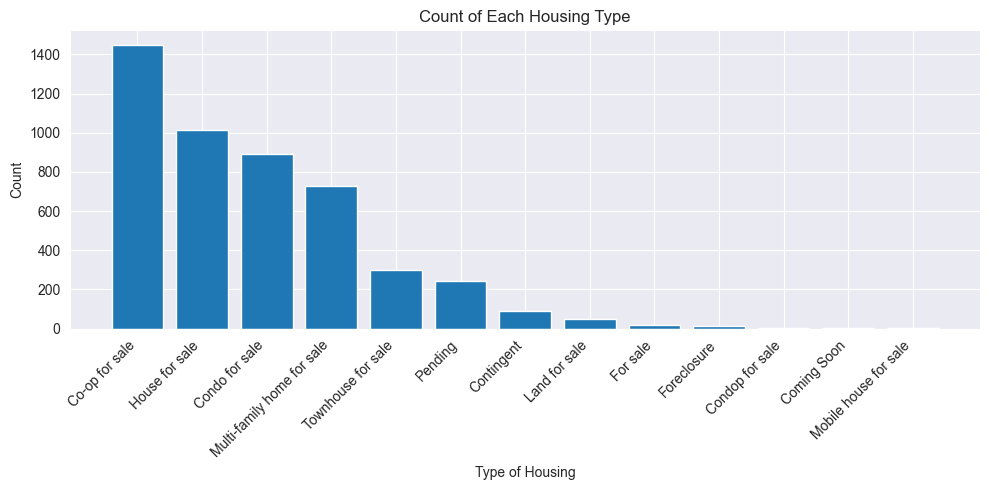

In [10]:
# count
counter = df['TYPE'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(counter.index, counter.values)
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Add labels and title
plt.xlabel('Type of Housing')
plt.ylabel('Count')
plt.title('Count of Each Housing Type')

# Show the plot
plt.tight_layout()
plt.show()

The most common street names in the dataset are dominated by major New York City boroughs and neighborhoods, with "Manhattan," "Brooklyn," and "Queens" having the highest counts of listings.

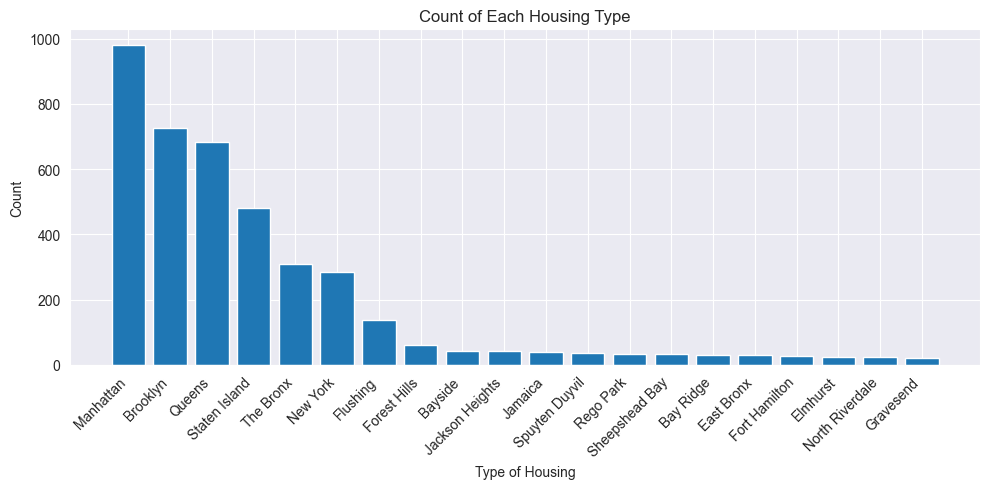

In [11]:
# count
counter = df['STREET_NAME'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(counter.index[:20],counter[:20])
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Add labels and title
plt.xlabel('Type of Housing')
plt.ylabel('Count')
plt.title('Count of Each Housing Type')

# Show the plot
plt.tight_layout()
plt.show()

# Outlier Detection

These boxplots for log prices, property square footage, number of beds, and number of baths reveal significant outliers, indicating the need to remove these extreme values to ensure more reliable machine learning results.

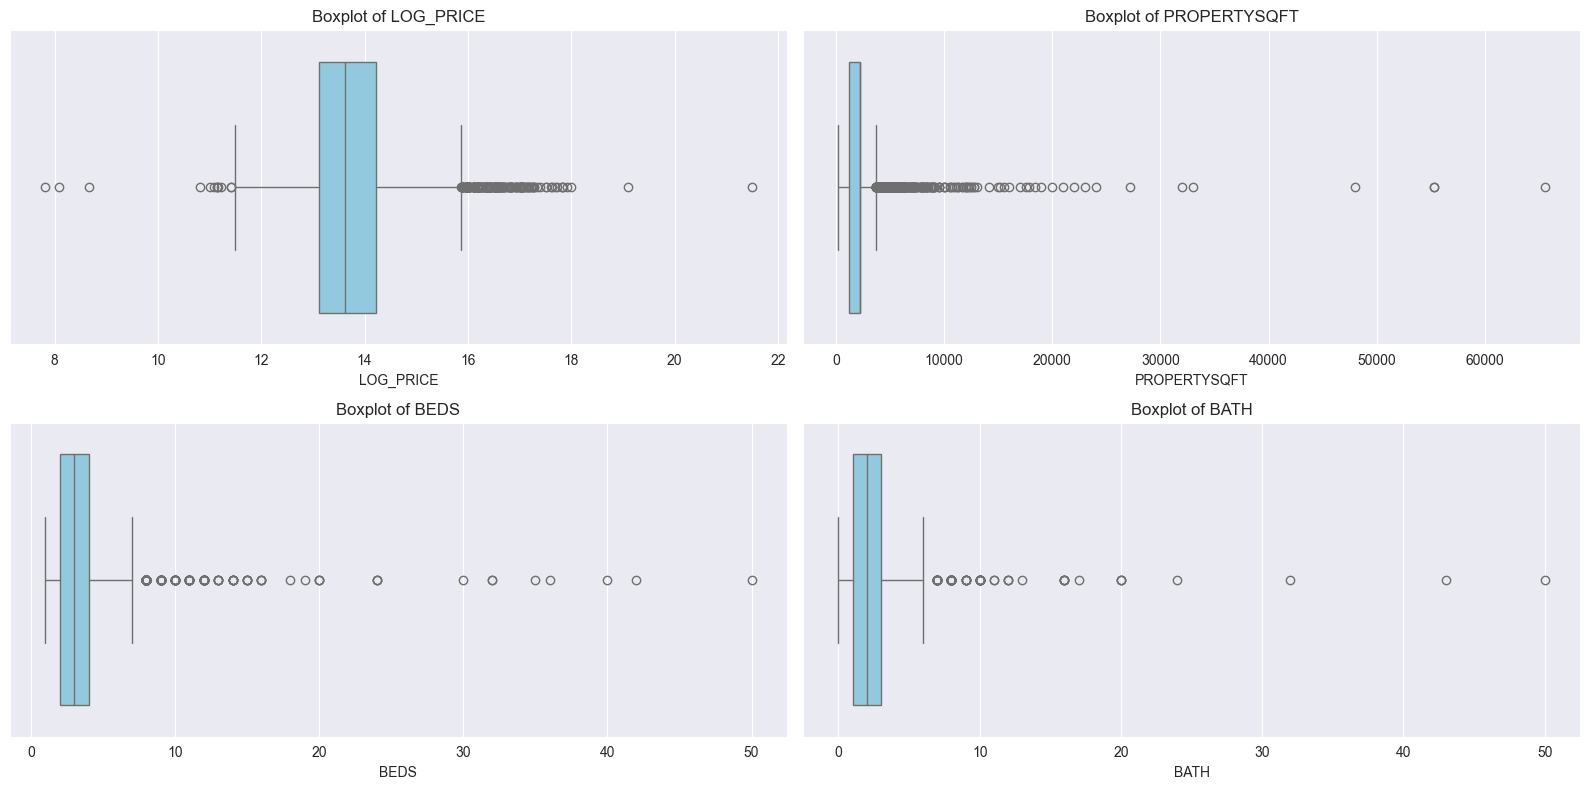

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
cols = ['LOG_PRICE','PROPERTYSQFT', 'BEDS', 'BATH']

plt.figure(figsize=(16, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [13]:
cols = ['LOG_PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"For '{col}': Outliers are below {lower_bound:.2f} or above {upper_bound:.2f}")

For 'LOG_PRICE': Outliers are below 11.47 or above 15.86
For 'PROPERTYSQFT': Outliers are below -276.31 or above 3660.52
For 'BEDS': Outliers are below -1.00 or above 7.00
For 'BATH': Outliers are below -2.00 or above 6.00


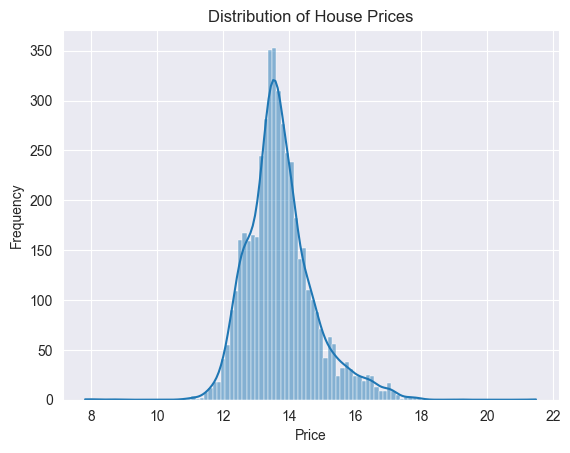

In [14]:
# Distribution of LOG_PRICE
sns.histplot(df['LOG_PRICE'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Relationships Between Numeric Features

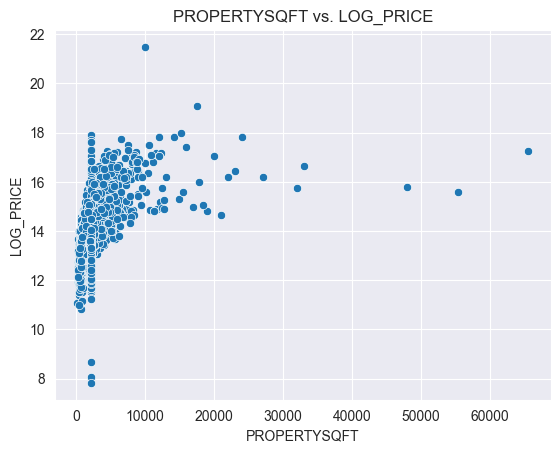

In [15]:
sns.scatterplot(data=df, x='PROPERTYSQFT', y='LOG_PRICE')
plt.title("PROPERTYSQFT vs. LOG_PRICE")
plt.show()


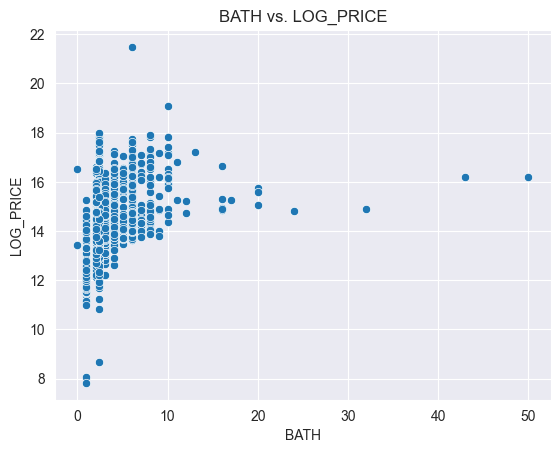

In [16]:
sns.scatterplot(data=df, x='BATH', y='LOG_PRICE')
plt.title("BATH vs. LOG_PRICE")
plt.show()

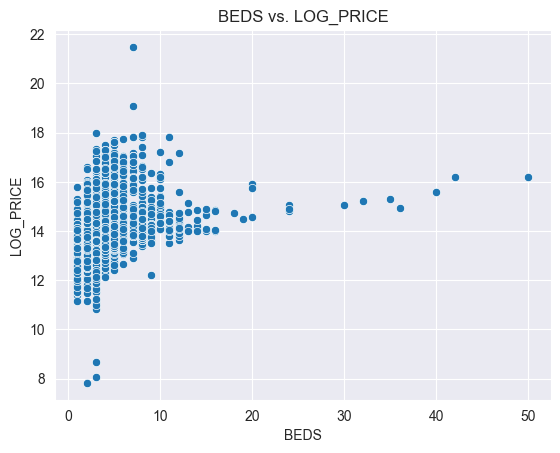

In [17]:
sns.scatterplot(data=df, x='BEDS', y='LOG_PRICE')
plt.title("BEDS vs. LOG_PRICE")
plt.show()

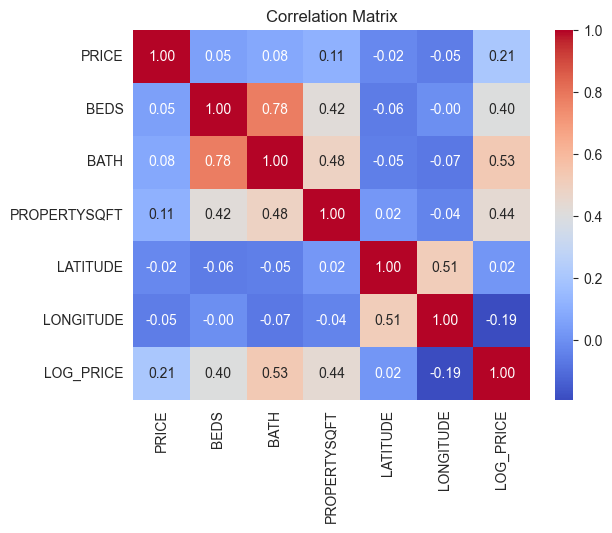

In [18]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Remove Outliers

In [19]:
def remove_outliers_iqr(df, cols):
    """
    Removes outliers from the specified columns in a DataFrame using the IQR method.
    Returns a new DataFrame without outliers.
    """
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Usage example:
cols_to_filter = ['LOG_PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']
df_clean = remove_outliers_iqr(df, cols_to_filter)
print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_clean.shape}")


Original shape: (4801, 18)
Shape after removing outliers: (4139, 18)


# New Features


In [20]:
df_housing = df_clean

ZIP CODE

In [21]:
# Extract ZIP code from MAIN_ADDRESS
# Assuming the ZIP code is always the last 5 digits in the MAIN_ADDRESS
df_housing['ZIP_CODE'] = df_housing['MAIN_ADDRESS'].apply(lambda x: re.search(r'\b\d{5}\b', x).group() if re.search(r'\b\d{5}\b', x) else None)

#  Count of properties by ZIP code to see if there are enough data points
zip_code_counts = df_housing['ZIP_CODE'].value_counts()
print(zip_code_counts)

# Display the first few rows to check the new features
df_housing[['MAIN_ADDRESS', 'ZIP_CODE']].head()


ZIP_CODE
11375    101
11235     97
10314     87
11209     84
11234     82
        ... 
10455      1
12205      1
13839      1
10282      1
11416      1
Name: count, Length: 201, dtype: int64


,MAIN_ADDRESS,ZIP_CODE
0,"2 E 55th St Unit 803New York, NY 10022",10022
2,"620 Sinclair AveStaten Island, NY 10312",10312
6,"157 W 126th St Unit 1BNew York, NY 10027",10027
8,"875 Morrison Ave Apt 3MBronx, NY 10473",10473
9,"1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",11230


Borough 

In [22]:
# Define a function to extract the first abbreviation or name before the comma in the STATE column
def extract_before_comma(state_value):
    if pd.notnull(state_value):  # Ensure the value is not NaN
        return state_value.split(',')[0].strip()
    return None

# Apply the function to create a new column with the extracted information
df_housing['BOROUGH_FROM_STATE'] = df_housing['STATE'].apply(extract_before_comma)

# distinct borough
print(df_housing['BOROUGH_FROM_STATE'].unique())

['New York' 'Staten Island' 'Bronx' 'Brooklyn' 'Jackson Heights'
 'Elmhurst' 'Woodside' 'Rego Park' 'Forest Hills' 'Briarwood' 'Queens'
 'Flushing' 'Jamaica' 'Manhattan' 'Richmond Hill South' 'Woodhaven'
 'Ridgewood' 'Rosedale' 'Ozone Park' 'Springfield Gardens' 'Far Rockaway'
 'Bellerose' 'Bayside' 'Floral Park' 'Fresh Meadows' 'Howard Beach'
 'Cambria Heights' 'Rockaway Park' 'East Elmhurst' 'Little Neck'
 'Long Island City' 'Ny' 'Corona' 'Kew Gardens' 'Brownville' 'Maspeth'
 'Queens Village' 'Richmond Hill' 'Middle Village' 'Saint Albans'
 'Kensington' 'Canarsie' 'South Ozone Park' 'College Point'
 'Bedford Stuyvesant' 'Whitestone' 'New York City' 'Hollis' 'Glen Oaks'
 'Douglaston' 'Astoria' 'Sunnyside' 'Glendale' 'New Hyde Park'
 'Crown Heights' 'Old Mill Basin' 'Beechhurst' 'Arverne'
 'Roosevelt Island' 'Bronx Ny' 'Nyc' 'Kew Gardens Hills' 'Belle Harbor'
 'East Flatbush' 'Kew Garden Hills' 'Malba' 'Ditmas Park' 'Brighton Beach'
 'Prospect Lefferts Gardens']


Distance From City Center

In [23]:
# New York City center coordinates
city_center = (40.7128, -74.0060)

# Calculate the distance to the city center for each property
df_housing['DIST_TO_CENTER'] = df_housing.apply(lambda row: haversine(city_center, (row['LATITUDE'], row['LONGITUDE'])), axis=1)

# Display the first few rows to check the new column
df_housing[['LATITUDE', 'LONGITUDE', 'DIST_TO_CENTER']].head()


,LATITUDE,LONGITUDE,DIST_TO_CENTER
0,40.761255,-73.974483,6.006765
2,40.541805,-74.196109,24.878236
6,40.809448,-73.946777,11.847915
8,40.821586,-73.874089,16.423539
9,40.615738,-73.969694,11.218852


Distance From Central PArk

In [24]:
# Coordinates for Central Park
central_park = (40.7851, -73.9683)

# Calculate the distance to Central Park for each property
df_housing['DIST_TO_CENTRAL_PARK'] = df_housing.apply(lambda row: haversine(central_park, (row['LATITUDE'], row['LONGITUDE'])), axis=1)

# Display the first few rows to check the new column
df_housing[['LATITUDE', 'LONGITUDE', 'DIST_TO_CENTRAL_PARK']].head()


,LATITUDE,LONGITUDE,DIST_TO_CENTRAL_PARK
0,40.761255,-73.974483,2.70209
2,40.541805,-74.196109,33.18266
6,40.809448,-73.946777,3.25766
8,40.821586,-73.874089,8.90729
9,40.615738,-73.969694,18.83261


Make Encoding to the categorical columns and then find the correlations

In [25]:
import category_encoders as ce

# Initialize the target encoder for a single column
def encoding_df(df):
    target_encoder = ce.TargetEncoder(cols=['ZIP_CODE'])
    df['ZIP_CODE_ENCODED'] = target_encoder.fit_transform(df['ZIP_CODE'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['BROKERTITLE'])
    df['BROKERTITLE_ENCODED'] = target_encoder.fit_transform(df['BROKERTITLE'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['TYPE'])
    df['TYPE_ENCODED'] = target_encoder.fit_transform(df['TYPE'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['ADMINISTRATIVE_AREA_LEVEL_2'])
    df['ADMINISTRATIVE_AREA_LEVEL_2_ENCODED'] = target_encoder.fit_transform(df['ADMINISTRATIVE_AREA_LEVEL_2'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['LOCALITY'])
    df['LOCALITY_ENCODED'] = target_encoder.fit_transform(df['LOCALITY'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['SUBLOCALITY'])
    df['SUBLOCALITY_ENCODED'] = target_encoder.fit_transform(df['SUBLOCALITY'], df['PRICE'])

    # Initialize the target encoder for a single column
    target_encoder = ce.TargetEncoder(cols=['BOROUGH_FROM_STATE'])
    df['BOROUGH_FROM_STATE_ENCODED'] = target_encoder.fit_transform(df['BOROUGH_FROM_STATE'], df['PRICE'])

    return df

df_housing = encoding_df(df_housing)

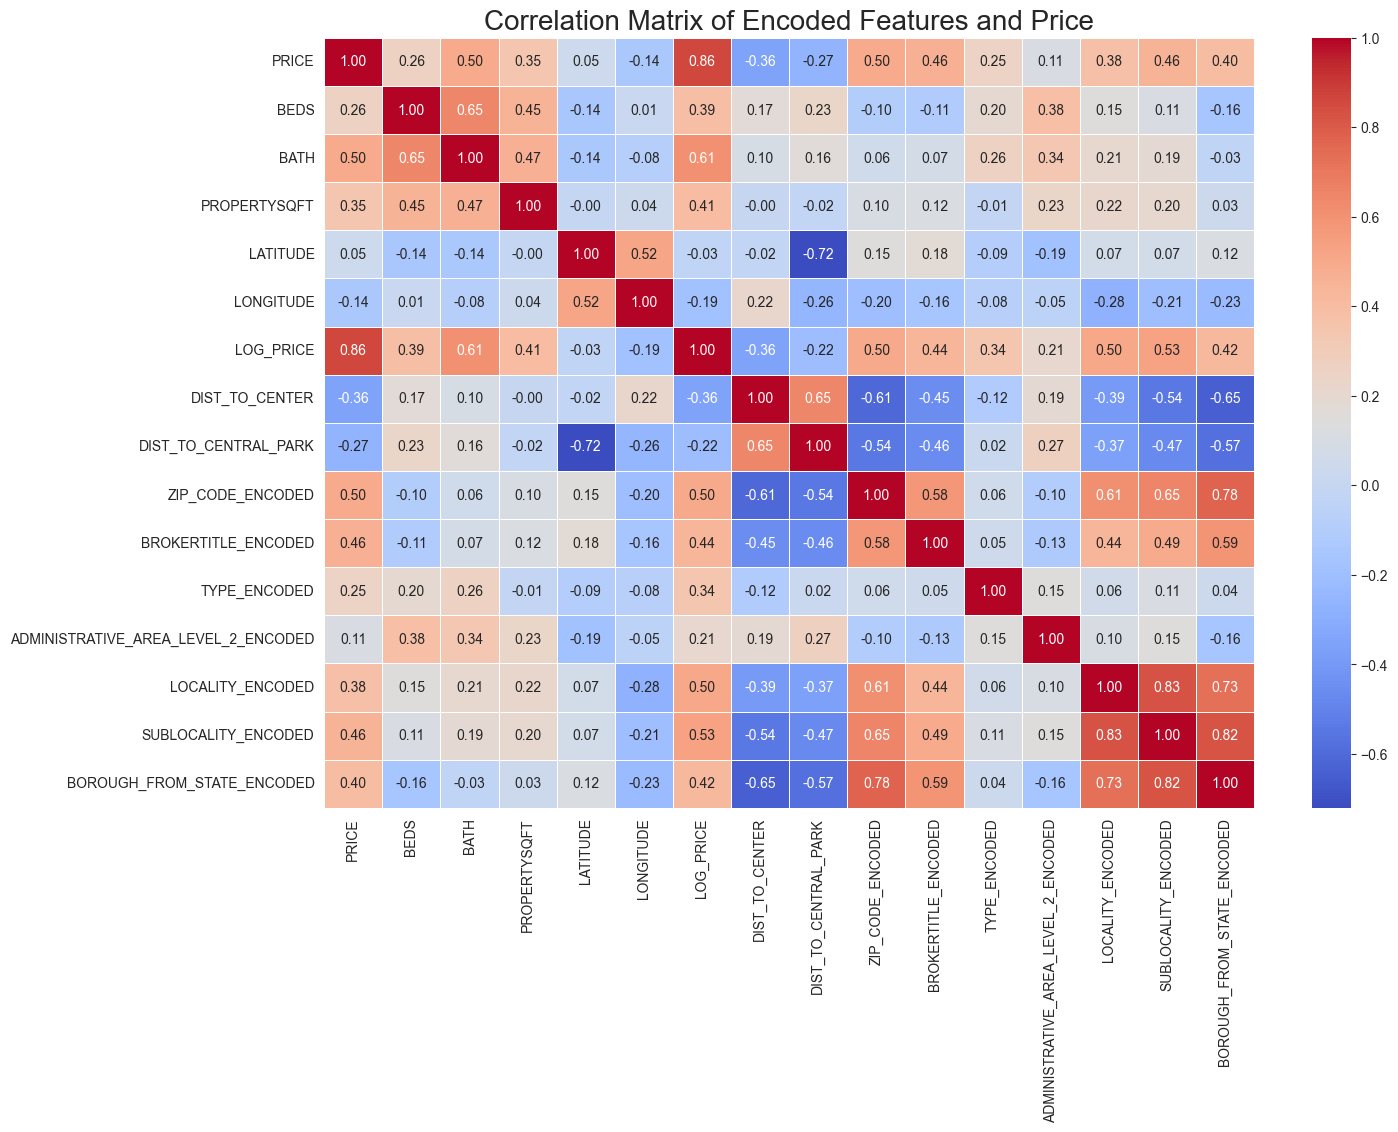

In [26]:
# Calculate the correlation matrix
correlation_matrix = df_housing.corr(numeric_only=True)

# Set up the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title("Correlation Matrix of Encoded Features and Price", size=20)

# Show the plot
plt.show()


In [27]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,LOG_PRICE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,12.660331
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,19.088510
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,12.468441
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,11.141876
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,17.822844
